<a href="https://colab.research.google.com/github/ovapichi/pose/blob/main/mediapipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q mediapipe

!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 23.7 MB/s eta 0:00:00


In [ ]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    print(pose_landmarks_list)
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image


In [ ]:


!wget -q -O image.jpg https://cdn.pixabay.com/photo/2019/03/12/20/39/girl-4051811_960_720.jpg

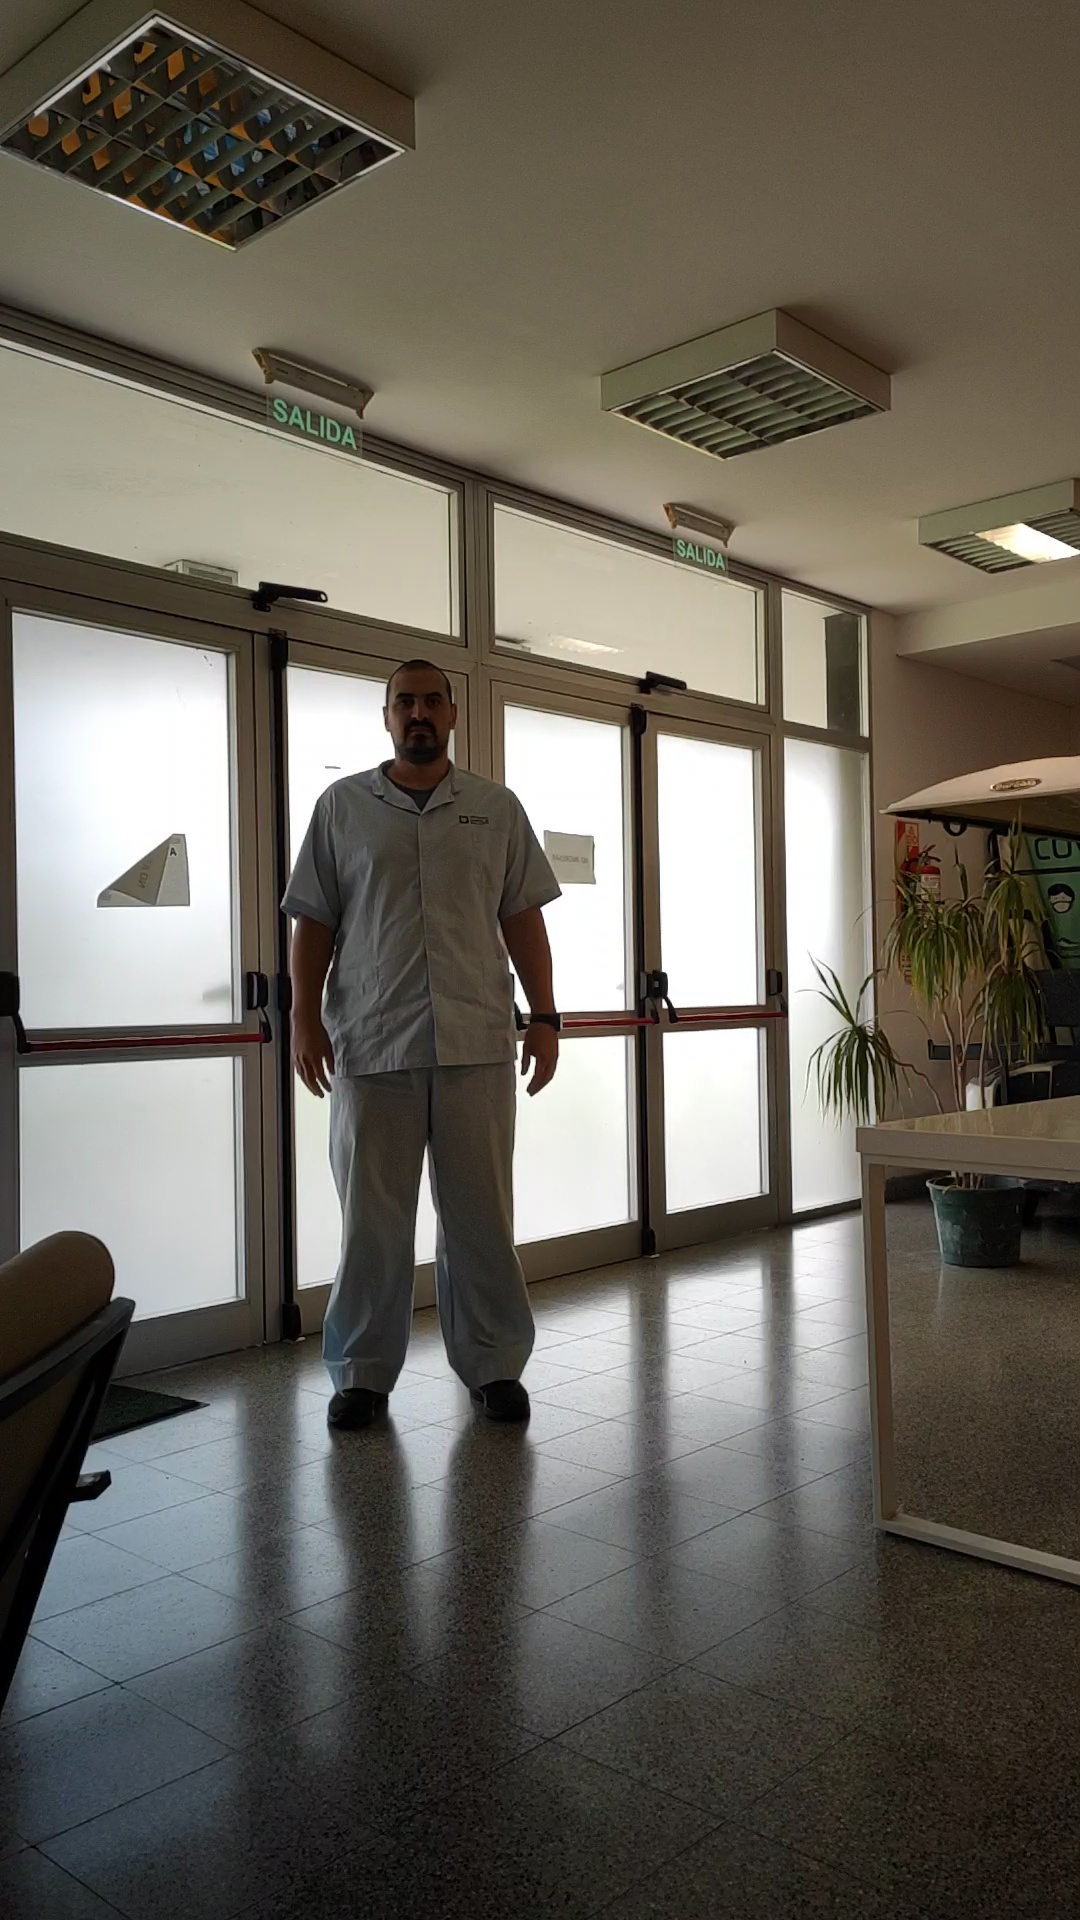

In [ ]:

#prueba de las imágenes

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/IMG_0005.jpg")
cv2_imshow(img)

# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)


[[NormalizedLandmark(x=0.38949084281921387, y=0.37233665585517883, z=-0.38036635518074036, visibility=0.9998691082000732, presence=0.9999802112579346), NormalizedLandmark(x=0.3963327407836914, y=0.365078330039978, z=-0.35631147027015686, visibility=0.9995377063751221, presence=0.9999446868896484), NormalizedLandmark(x=0.40236741304397583, y=0.365341454744339, z=-0.356792688369751, visibility=0.9994427561759949, presence=0.9999444484710693), NormalizedLandmark(x=0.4084516763687134, y=0.36563777923583984, z=-0.35669103264808655, visibility=0.9995697140693665, presence=0.9999282360076904), NormalizedLandmark(x=0.3811632990837097, y=0.36506515741348267, z=-0.36102357506752014, visibility=0.9997398257255554, presence=0.9999417066574097), NormalizedLandmark(x=0.37620809674263, y=0.36524033546447754, z=-0.3615337312221527, visibility=0.9997997879981995, presence=0.9999560117721558), NormalizedLandmark(x=0.3711797595024109, y=0.3653106093406677, z=-0.3617957532405853, visibility=0.999852061271

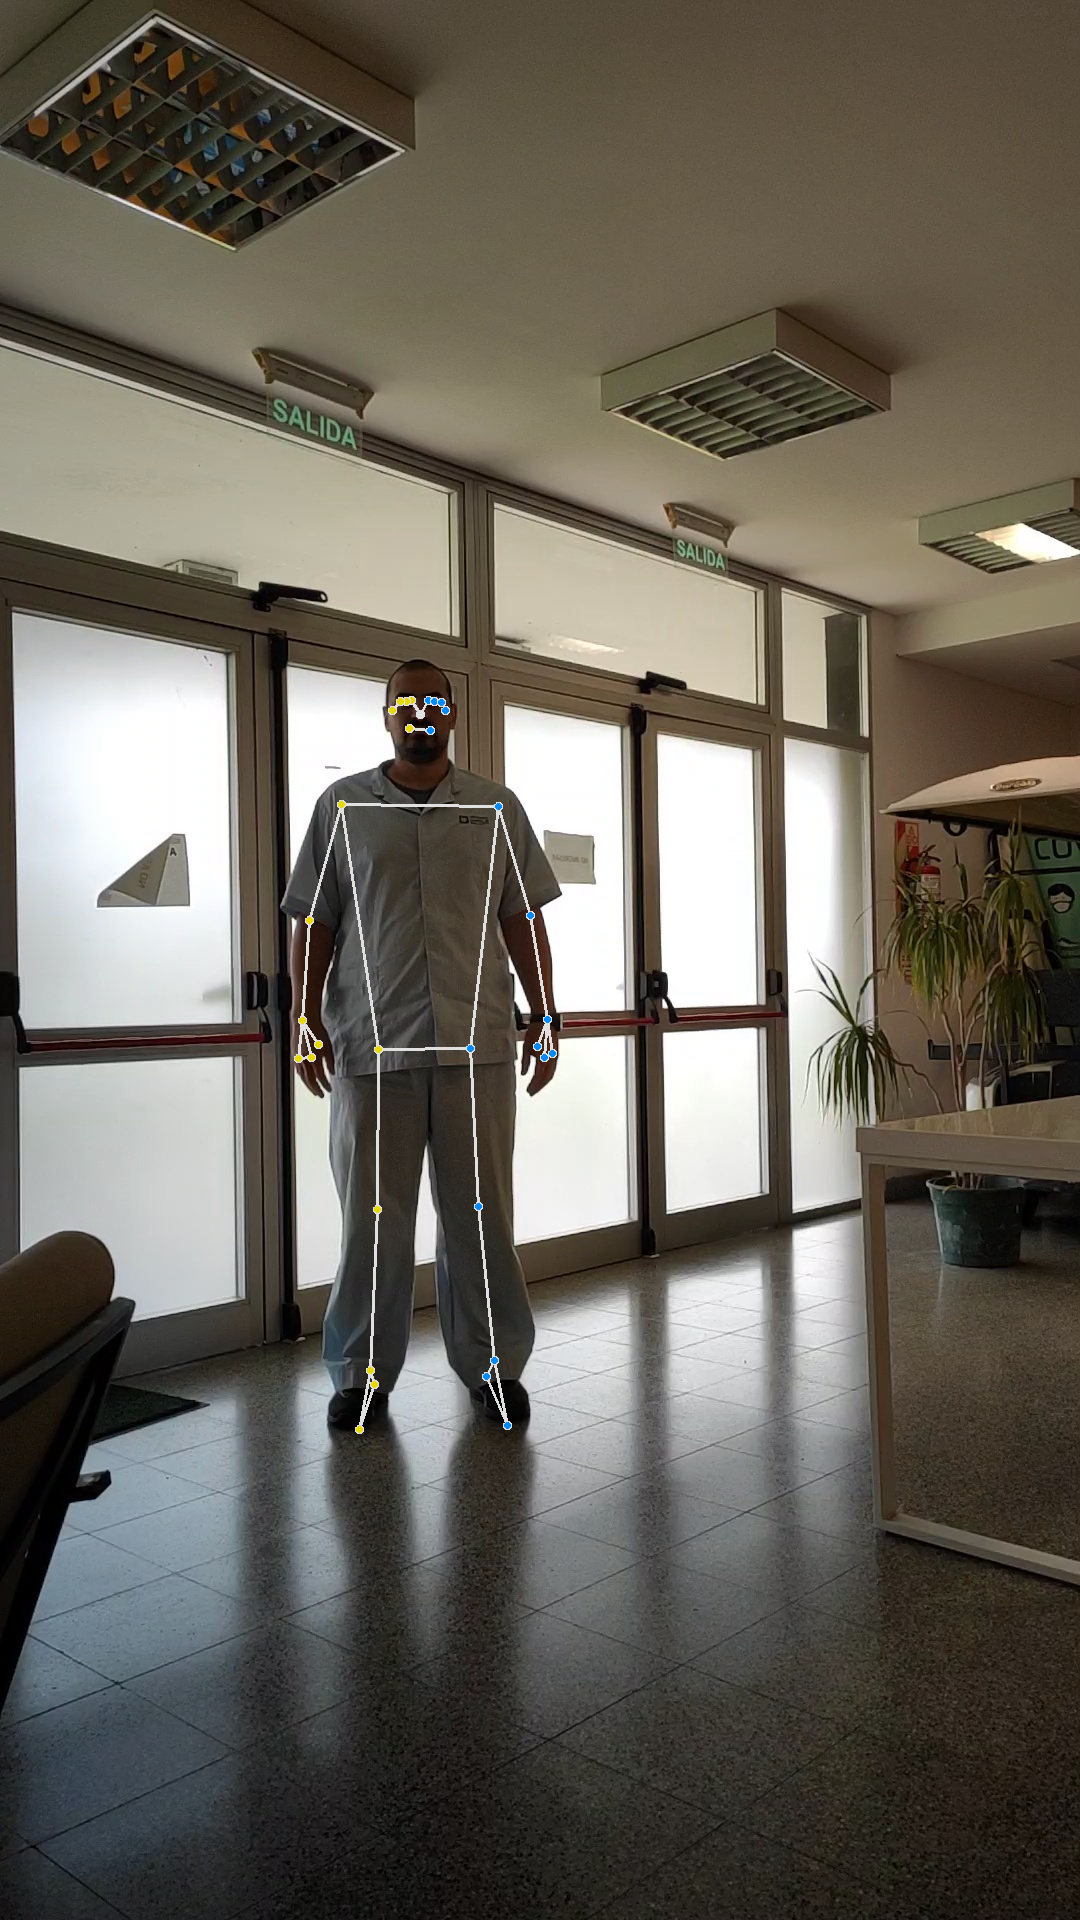

In [ ]:


# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

vision.RunningMode.VIDEO

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.


image = mp.Image.create_from_file("/content/IMG_0005.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image= draw_landmarks_on_image(image.numpy_view(), detection_result)

cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

#Visualize the pose segmentation mask.

segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
#print(segmentation_mask)
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
#cv2_imshow(visualized_mask)

In [ ]:
import cv2
cv_mat = cv2.imread('/content/image.jpg')
rgb_frame = mp.ImageFrame(image_format=.SRGB, data=cv_mat)
gray_frame = mp.ImageFrame(
    image_format=jpg.GRAY,
    data=cv2.cvtColor(cv_mat, cv2.COLOR_RGB2GRAY))

from PIL import Image
pil_img = Image.new('RGB', (60, 30), color = 'red')
image_frame = mp.ImageFrame(
    image_format=mp.ImageFormat.SRGB, data=np.asarray(pil_img))

SyntaxError: invalid decimal literal (<ipython-input-46-eade6c5fcdcd>, line 3)

In [ ]:
# Nombres de los puntos corporales
def extraer(resultados):
    point_names = [
      "nose",
      "left eye (inner)",
      "left eye",
      "left eye (outer)",
      "right eye (inner)",
      "right eye",
      "right eye (outer)",
      "left ear",
      "right ear",
      "mouth (left)",
      "mouth (right)",
      "left shoulder",
      "right shoulder",
      "left elbow",
      "right elbow",
      "left wrist",
      "right wrist",
      "left pinky",
      "right pinky",
      "left index",
      "right index",
      "left thumb",
      "right thumb",
      "left hip",
      "right hip",
      "left knee",
      "right knee",
      "left ankle",
      "right ankle",
      "left heel",
      "right heel",
      "left foot index",
      "right foot index"
  ]

  # Diccionario para almacenar las coordenadas x y z de cada punto corporal
    coords_dict = {}

  # Iterar sobre los puntos de referencia corporales en la única sublista
    for i, landmark in enumerate(resultados[0]):
        x = landmark.x
        y = landmark.y
        z = landmark.z

        # Agregar las coordenadas x y z al diccionario con el nombre del punto como clave
        coords_dict[point_names[i]] = (x,y, z)

    # Imprimir las coordenadas x y z para cada punto corporal
    for name, coords in coords_dict.items():
        print(f"{name}: x={coords[0]},y={coords[1]} z={coords[2]}")
    return coords_dict

In [ ]:

nose_coords = coords_dict["nose"]
print(f"Coordenadas de la nariz: x={nose_coords[0]}, y={nose_coords[1]}, z={nose_coords[2]}")

Coordenadas de la nariz: x=0.33685022592544556, y=0.1898348033428192, z=-0.14663781225681305


In [ ]:


# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision


# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
def procesar(path):

  img = cv2.imread(path)
  cv2_imshow(img)
  image = mp.Image.create_from_file(path)

  # STEP 4: Detect pose landmarks from the input image.
  detection_result = detector.detect(image)

  # STEP 5: Process the detection result. In this case, visualize it.
  annotated_image= draw_landmarks_on_image(image.numpy_view(), detection_result)

  cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

  #Visualize the pose segmentation mask.

  segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
  #print(segmentation_mask)
  visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
  #cv2_imshow(visualized_mask)
  return

In [ ]:
#Guarda los frames de un video en archivos .jpg
import cv2

def guardarFrames(direccion):
  capture = cv2.VideoCapture(direccion)
  cont = 0
  path = '/content/'

  while (capture.isOpened()):
      ret, frame = capture.read()

      if (ret == True):

          cv2.imwrite(path + 'IMG_%04d.jpg' % cont, frame)
          cont += 1
          if (cv2.waitKey(1) == ord('s')):
              break
      else:
          break

  capture.release()
  cv2.destroyAllWindows()
  pass